In [56]:
import json
import re
import numpy as np

In [132]:
def generate_pairwise(start_index, num_cards, decks):
    """
    Generates pairwise counts of cards appearing in decks together
    inputs: start_index is used to generate indexes for cards, assumes card ID's ascend incrementally
    
    """
    array = np.zeros((num_cards, num_cards))
    count_array = np.zeros(num_cards) #occurence of each card
    for deck in decks:
        ids = list(deck.keys())
        for i in range(len(ids)):
            id1 = int(ids[i])-start_index
            count_array[id1] += deck[ids[i]]
            for j in range(i+1, len(ids)):
                id2 = int(ids[j])-start_index
                # use ratios t
                array[id1,id2] += deck[ids[j]]/deck[ids[i]]
                array[id2,id1] += deck[ids[i]]/deck[ids[j]]
    print('done')
    return array, count_array
                
            

In [133]:
card_dict = {} # map card ID to card name (may be unnecessary)
card_map = [] # index to card ID for nparray 
start_index = 0 # ID of first card - follows convention of TOP8Draft values
with open('M19_M19_M19_cards.txt') as f:
    for line in f:
        split = line.split(';')
        
        card_id = int(split[1].rstrip())
        card_name = split[0]
        
        card_dict[card_id] = card_name
        card_map.append(card_id)
        
    start_index = card_map[0]
# print(card_dict)
        
with open('consolidated_decks.json') as g:
    j = json.load(g)
    decks = j['decks']
    synergies, counts = generate_pairwise(start_index, len(card_map), decks)
    print(synergies)


done
[[   0.         1796.5         460.         ...  860.33333333
   838.          861.5       ]
 [1704.58333333    0.          489.66666667 ...  885.66666667
   856.25        872.        ]
 [ 496.          556.            0.         ...  242.5
   249.          228.        ]
 ...
 [ 887.          956.83333333  241.         ...    0.
   481.          498.5       ]
 [ 890.5         956.5         247.5        ...  473.83333333
     0.          462.33333333]
 [ 889.          928.          222.         ...  491.
   463.83333333    0.        ]]


In [135]:
print(counts)

[13214. 13359.  3526.  6002. 14085. 13413. 35952. 35242.  6748. 35766.
 35913. 35501. 13882. 15290. 35964. 35961.  5418. 35824. 35314. 13377.
  6617. 13670.  6631. 35595. 37773. 13349.  6325. 35544. 13498. 13454.
 35683. 35627.  5865.  3570. 35344. 35773. 13281. 35108.  5440. 35894.
 35823.  6405. 13358. 35525. 35880. 35538. 13342. 35803. 13620. 35698.
 35422.  6649. 35173. 35733. 13868. 35732. 35171. 35284. 14158.  5686.
 13366.  5431.  6307. 35612.  2678.  5507.  6222. 13386.  6039. 35332.
 35507. 13186. 13393. 13380. 35398.  5725. 13279. 13560.  3378. 34972.
 35583. 35606. 35379.  6571. 36171. 13419. 35760.  3277. 35604.  6092.
  6820. 13478. 35459. 35300. 35753. 13611.  5333. 13781.  6509. 35683.
 35793.  5571. 35610.  6724. 38701.  2760.  5755. 35414. 35879. 15493.
 13433.  5928.  5494. 13516. 13562. 13426. 13272. 35701. 35347. 35363.
 13133. 36387. 36027. 35707. 13826. 35494. 35430.  5297.  2702.  6945.
 35517. 35535. 35322.  5885.  6897.  6421. 13296. 13560. 36626. 13687.
 35903

In [212]:
a = synergies.T/counts
a *= 1000
a = a.round()

In [213]:
# synergies = synergies.round()

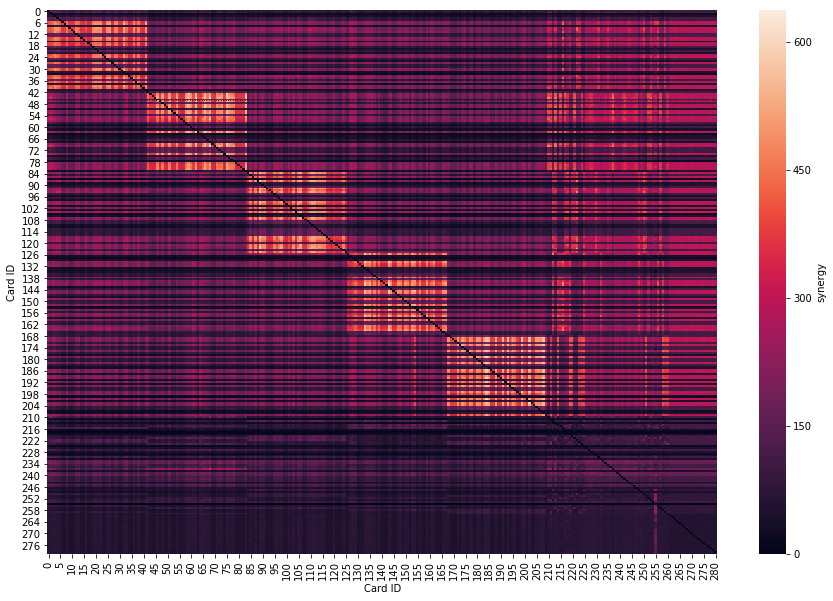

In [214]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(a, ax=ax, cbar_kws={'label': 'synergy'})
plt.xlabel('Card ID')
plt.ylabel('Card ID')
plt.show()

In [220]:
a.max(axis=1)

array([151., 194.,  40.,  76., 191., 177., 504., 553.,  84., 542., 521.,
       524., 175., 186., 526., 512.,  62., 470., 496., 190.,  83., 198.,
        86., 497., 507., 195.,  84., 505., 188., 194., 539., 508.,  81.,
        56., 456., 538., 180., 499.,  75., 532., 500.,  84., 180., 576.,
       581., 637., 207., 574., 199., 580., 576., 111., 559., 571., 202.,
       535., 563., 483., 211.,  97., 209.,  61.,  97., 588.,  31.,  79.,
        97., 210.,  92., 570., 631., 204., 236., 197., 550.,  97., 212.,
       213.,  42., 497., 528., 534., 531.,  91., 565., 203., 503.,  42.,
       578.,  97.,  88., 222., 598., 518., 572., 200.,  79., 194.,  89.,
       563., 530.,  72., 514.,  85., 528.,  42.,  90., 560., 531., 189.,
       199.,  93.,  88., 187., 203., 204., 209., 575., 544., 511., 174.,
       536., 601., 578., 180., 554., 586.,  61.,  31.,  77., 585., 515.,
       489.,  87.,  88.,  89., 170., 209., 531., 203., 523., 607., 600.,
        84., 211., 571., 576., 208.,  86., 526., 21

In [236]:
itemindex = np.where(a == 4)
itemindex

(array([218, 218, 218, 218, 218, 218, 218, 218, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255]),
 array([171, 173, 182, 190, 201, 204, 211, 219, 250, 251, 252, 253, 257,
        259, 260, 261, 263, 269, 271, 273, 275, 276]))

https://img.scryfall.com/cards/normal/front/e/1/e19723ad-7bd2-49ee-a57a-ece99018f4e8.jpg?1538881020
Glaive of the Guildpact


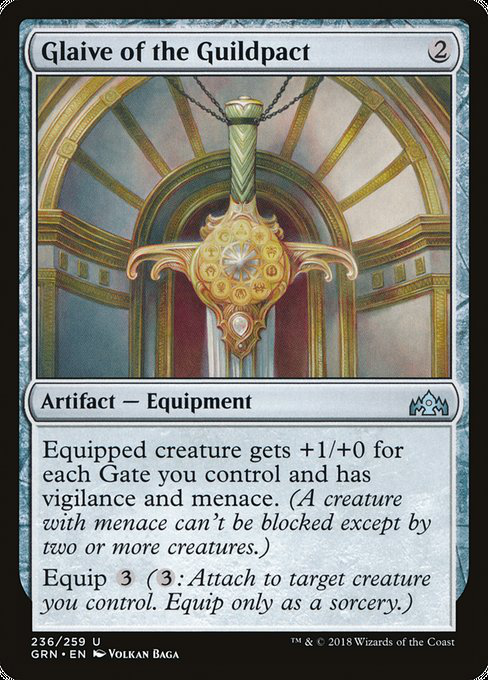

In [208]:
import requests
from PIL import Image
import requests
from io import BytesIO

def getCard(id):
    """
    Returns card JSON based on ID from Scryfall API
    """
    r = requests.get('https://api.scryfall.com/cards/multiverse/' + str(id))
    data = r.json()
    try:
        name = data['name']
    except KeyError:
        name = ''
    try:
        url = data['image_uris']['normal']
    except KeyError:
        url = ''
    return name, url

def getImage(url):
    """
    Returns "normal" image JPEG from Scryfall Image Library
    """
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

name, image_url = getCard(452986)
print(image_url)
print(name)
getImage(image_url)

In [209]:
#404 [104, 123]
print(card_dict[card_map[104]] + " ; " + card_dict[card_map[123]])

#398 [176, 173]
print(card_dict[card_map[176]] + " ; " + card_dict[card_map[173]])

#394 [24, 7]
print(card_dict[card_map[24]] + " ; " + card_dict[card_map[7]])

#398 [104, 122]
print(card_dict[card_map[104]] + " ; " + card_dict[card_map[122]])

#391 [204, 171]
print(card_dict[card_map[204]] + " ; " + card_dict[card_map[171]])

Lich's Caress ; Vampire Neonate
Druid of the Cowl ; Daggerback Basilisk
Luminous Bonds ; Cavalry Drillmaster
Lich's Caress ; Two-Headed Zombie
Titanic Growth ; Colossal Dreadmaw


In [198]:
print(start_index)

447137


In [238]:
name, image_url = getCard(218 + 447137)
getImage(image_url)


MissingSchema: Invalid URL '': No schema supplied. Perhaps you meant http://?

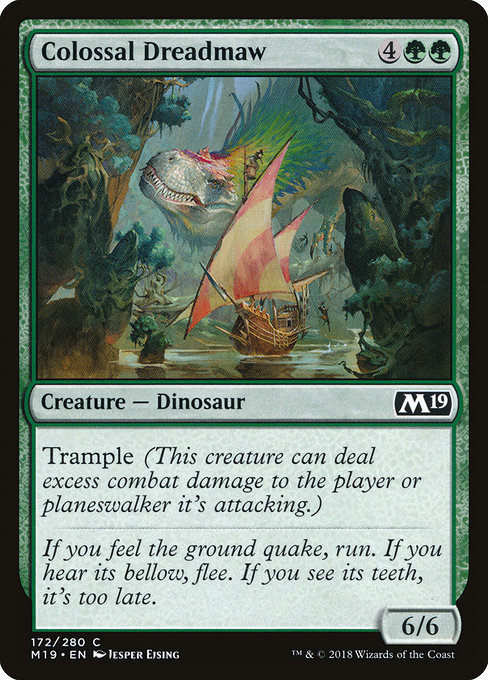

In [237]:
name, image_url = getCard(171 + 447137)
getImage(image_url)

In [ ]:
# #14259 [176, 173]
# print(card_dict[card_map[176]] + " ; " + card_dict[card_map[173]])

# #14174 [171, 169]
# print(card_dict[card_map[171]] + " ; " + card_dict[card_map[169]])

# #14106 [170, 171]
# print(card_dict[card_map[170]] + " ; " + card_dict[card_map[171]])

# #14124 [173, 176]
# print(card_dict[card_map[173]] + " ; " + card_dict[card_map[176]])

# #14124 [173, 176]
# print(card_dict[card_map[173]] + " ; " + card_dict[card_map[176]])